In [ ]:
#LOGISTIC REGRESSION

In [ ]:
# Dataset: Pima Indians Diabetes Database

In [ ]:
#STEP 1: Creating Dataframe

In [ ]:
import pandas as pd
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Here, 0--> The person does not have diabetes
#      1--> The person has diabetes

In [ ]:
#Step 2: Since the dataset is small, we are skipping the preprocessing of data

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
#Step 3: Data Visualisation

In [ ]:
import matplotlib.pyplot as plt

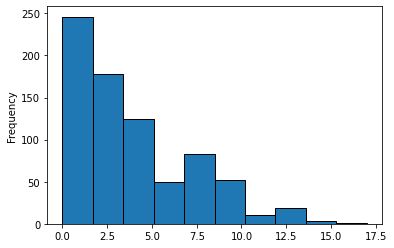

In [ ]:
df['Pregnancies'].plot(kind='hist', edgecolor='black')

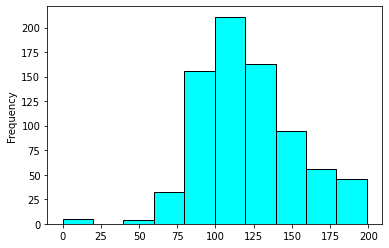

In [ ]:
df['Glucose'].plot(kind='hist', color ='cyan', edgecolor='black')

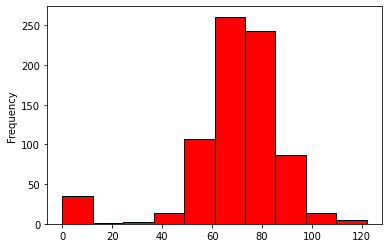

In [ ]:
df['BloodPressure'].plot(kind='hist', color = 'red', edgecolor='black')

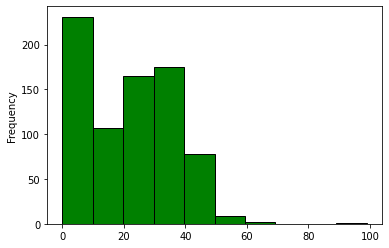

In [ ]:
df['SkinThickness'].plot(kind='hist', color = 'green',  edgecolor='black')

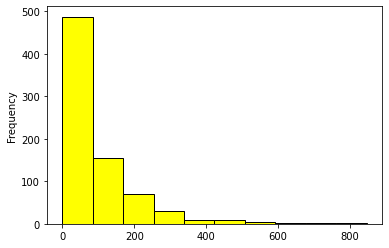

In [ ]:
df['Insulin'].plot(kind='hist',color ='yellow', edgecolor='black')

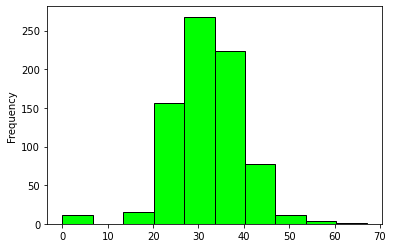

In [ ]:
df['BMI'].plot(kind='hist', color = 'lime', edgecolor='black')

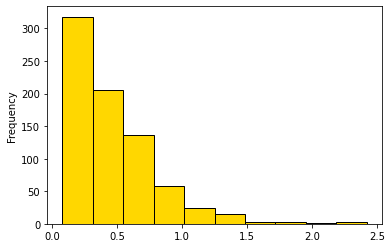

In [ ]:
df['DiabetesPedigreeFunction'].plot(kind='hist', color = 'gold', edgecolor='black')

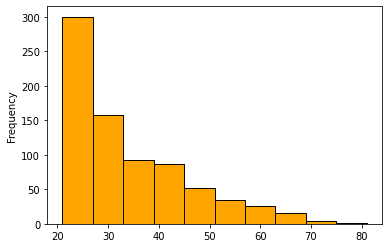

In [ ]:
df['Age'].plot(kind='hist', color = 'orange', edgecolor='black')

In [ ]:
#Step 4:  Dividing the data into input and output

In [ ]:
# Here, INPUT = Glucose,
#               BloodPressure,
#               SkinThickness,
#               Insulin,
#               BMI,
#               DiabetesPedigreeFunction,
#               Age  
#      OUTPUT = Outcome

In [ ]:
#Input(x)--> Two Dimensional 
x = df.iloc[:,0:8].values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
#Ouput(y) --> One Dimensional
y=df.iloc[:,8].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
# Step 5: Training and Testing variables

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [ ]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(768, 8)
(576, 8)
(192, 8)


In [ ]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(768,)
(576,)
(192,)


In [ ]:
# Step 6: Normalisaton/Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
# Step 7: Applying Regressor
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
# Step 8: Fitting the model
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# Step 9 : Predicting the output
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
#Step 10: Calculating the Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

75.0

In [ ]:
# INDIVIDUAL PREDICTION 1
p1 = scaler.transform([[6,148,72,35,0,33.6,0.627,50]]) 
p1

array([[0.46153846, 0.74371859, 0.63157895, 0.7       , 0.        ,
        0.63516068, 0.2939208 , 0.65909091]])

In [ ]:
model.predict(p1)

array([1])

In [ ]:
# INDIVIDUAL PREDICTION 2
p2 = scaler.transform([[1,85,66,29,0,26.6,0.351,31]]) 
p2

array([[0.07692308, 0.42713568, 0.57894737, 0.58      , 0.        ,
        0.50283554, 0.13998885, 0.22727273]])

In [ ]:
model.predict(p2)

array([0])

In [ ]:
# INDIVIDUAL PREDICTION 3
p3 = scaler.transform([[7,129,68,49,125,38.5,0.439,43]]) 
p3

array([[0.53846154, 0.64824121, 0.59649123, 0.98      , 0.18382353,
        0.72778828, 0.1890686 , 0.5       ]])

In [ ]:
model.predict(p3)

array([1])